# Dependencias

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [5]:
data = pd.read_csv("./empleo_nacion/empleos_bsas_202303300007.csv")

In [6]:
data.head()

,fecha,departamento,provincia,clase,puestos
0,2014-01-01,CABA,CABA,"Agricultura, ganadería, caza y servicios relac...",5443
1,2014-01-01,CABA,CABA,Silvicultura y explotación forestal,119
2,2014-01-01,CABA,CABA,Pesca y acuicultura,581
3,2014-01-01,CABA,CABA,Extracción de carbón y lignito,24
4,2014-01-01,CABA,CABA,Extracción de petróleo crudo y gas natural,4145


In [7]:
# cambiamos el campo fecha de str a datetime
data["fecha"] = data.fecha.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

# EDA

In [8]:
fecha14 = datetime.strptime('2015-01-01', "%Y-%m-%d").date()
data14 = data.loc[(data['fecha'] < fecha14)]

In [9]:
data14["puestos2"] = data14.puestos.shift()

In [10]:
data14["delta"] = data14.puestos - data14.puestos2 

In [11]:
data14.fillna(0, inplace = True)

In [12]:
dfagrupado = data14.groupby(by=["fecha","provincia"]).sum().delta.reset_index()

In [13]:
dfagrupado

,fecha,provincia,delta
0,2014-01-01,Buenos Aires,-479.0
1,2014-01-01,CABA,-3650.0
2,2014-02-01,Buenos Aires,-514.0
3,2014-02-01,CABA,-113.0
4,2014-03-01,Buenos Aires,-318.0
5,2014-03-01,CABA,-35.0
6,2014-04-01,Buenos Aires,20.0
7,2014-04-01,CABA,-64.0
8,2014-05-01,Buenos Aires,-802.0
9,2014-05-01,CABA,-88.0


In [16]:
data_caba = data.loc[data.provincia == "CABA"].groupby(by=["fecha","provincia"]).sum().reset_index()

In [20]:
data_caba["fecha"]

0      2014-01-01
1      2014-02-01
2      2014-03-01
3      2014-04-01
4      2014-05-01
          ...    
103    2022-08-01
104    2022-09-01
105    2022-10-01
106    2022-11-01
107    2022-12-01
Name: fecha, Length: 108, dtype: object

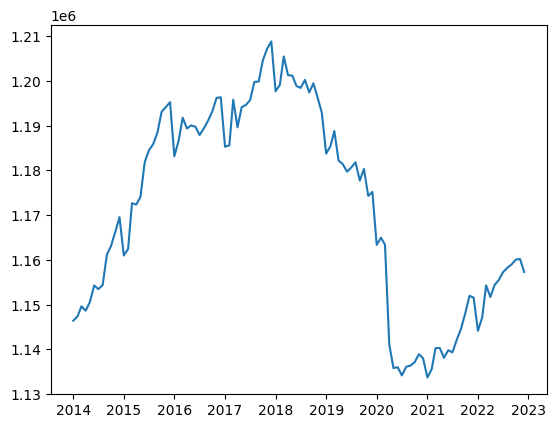

In [21]:
plt.plot(data_caba.fecha, data_caba.puestos)

# Feature engineering